<a href="https://colab.research.google.com/github/JJammins/DecisionTree/blob/main/%EB%B2%84%EC%84%AF_%ED%8A%B8%EB%A6%AC%EB%AA%A8%EB%8D%B8_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = pd.read_csv('sample_data/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [86]:
# 데이터 모양
data.shape

(8124, 23)

In [87]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [106]:
# 피처 / 타깃 나누기
F = data.drop('class', axis=1)
t = data['class']

# 통계치 확인하기
# unique : 중복을 제거한 값, top : 빈도수가 가장 많은 것, freq : 갯수
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [108]:
# 데이터 전처리 : 원 핫 인코딩
# 열이 늘어남
# 해당 범주에 해당하는 경우에는 1, 해당하지 않으면 0 반환
F_one_hot = pd.get_dummies(F)
F_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [110]:
# 데이터 분할
F_train, F_test, t_train, t_test = train_test_split(F_one_hot, t, test_size = 0.3, random_state = 1)
print(F_train.shape)
print(F_test.shape)
print(t_train.shape)
print(t_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [111]:
# 모델 성능 비교
for depth in [2, 3, 4, 5, 6, 7]:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(F_train, t_train)
    pred = tree.predict(F_test)
    print(f"max_depth={depth} - 예측 정확도 : {accuracy_score(t_test, pred):.4f}")

max_depth=2 - 예측 정확도 : 0.9524
max_depth=3 - 예측 정확도 : 0.9881
max_depth=4 - 예측 정확도 : 0.9844
max_depth=5 - 예측 정확도 : 0.9992
max_depth=6 - 예측 정확도 : 0.9992
max_depth=7 - 예측 정확도 : 1.0000


In [137]:
# 모델 생성
tree = DecisionTreeClassifier(max_depth = 3)

# 학습
tree.fit(F_train, t_train)

# 교차검증
from sklearn.model_selection import cross_val_score

score = cross_val_score(tree, F_train, t_train, cv=5, scoring = 'accuracy')
print('교차 검증별 정확도 : ', np.round(score, 3))
print('평균 검증 정확도 : ', np.round(np.mean(score), 3))

교차 검증별 정확도 :  [0.984 0.978 0.982 0.986 0.965]
평균 검증 정확도 :  0.979


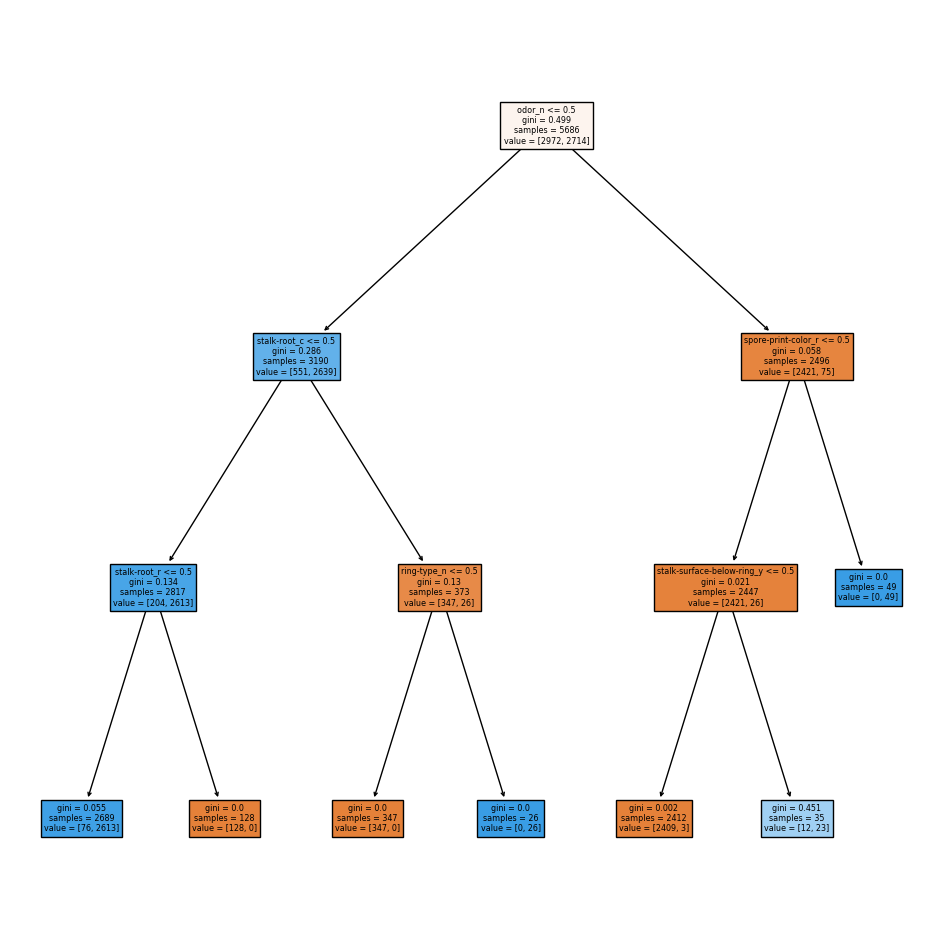

In [138]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (12, 12))
plot_tree(tree, filled = True, feature_names = F_one_hot.columns)
plt.show()